In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

In [2]:
"""from matplotlib import colors
from matplotlib.colors import ListedColormap
ddl_heat = ['#DBDBDB','#DCD5CC','#DCCEBE','#DDC8AF','#DEC2A0','#DEBB91',\
            '#DFB583','#DFAE74','#E0A865','#E1A256','#E19B48','#E29539']
ddlheatmap = colors.ListedColormap(ddl_heat)
def plot_classification_report(cr, title=None, cmap=ddlheatmap):
    title = title or 'Classification report'
    lines = cr.split('\n')
    classes = []
    matrix = []
    for line in lines[2:(len(lines)-3)]:
        s = line.split()
        classes.append(s[0])
        value = [float(x) for x in s[1: len(s) - 1]]
        matrix.append(value)
    
    fig, ax = plt.subplots(1)
    
    for column in range(len(matrix)+1):
        for row in range(len(classes)):
            txt = matrix[row][column]
            ax.text(column,row,matrix[row][column],va='center',ha='center')
    fig = plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(len(classes)+1)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.ylabel('Classes')
    plt.xlabel('Measures')
    plt.show()
"""

"from matplotlib import colors\nfrom matplotlib.colors import ListedColormap\nddl_heat = ['#DBDBDB','#DCD5CC','#DCCEBE','#DDC8AF','#DEC2A0','#DEBB91',            '#DFB583','#DFAE74','#E0A865','#E1A256','#E19B48','#E29539']\nddlheatmap = colors.ListedColormap(ddl_heat)\ndef plot_classification_report(cr, title=None, cmap=ddlheatmap):\n    title = title or 'Classification report'\n    lines = cr.split('\n')\n    classes = []\n    matrix = []\n    for line in lines[2:(len(lines)-3)]:\n        s = line.split()\n        classes.append(s[0])\n        value = [float(x) for x in s[1: len(s) - 1]]\n        matrix.append(value)\n    \n    fig, ax = plt.subplots(1)\n    \n    for column in range(len(matrix)+1):\n        for row in range(len(classes)):\n            txt = matrix[row][column]\n            ax.text(column,row,matrix[row][column],va='center',ha='center')\n    fig = plt.imshow(matrix, interpolation='nearest', cmap=cmap)\n    plt.title(title)\n    plt.colorbar()\n    x_tick_marks = np.ar

In [3]:
def show_values(pc, fmt="%.2f", **kw):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    from itertools import izip
    pc.update_scalarmappable()
    ax = pc.get_axes()
    #ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in izip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)


def cm2inch(*tupl):
    '''
    Specify figure size in centimeter in matplotlib
    Source: https://stackoverflow.com/a/22787457/395857
    By gns-ank
    '''
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)


def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):
    '''
    Inspired by:
    - https://stackoverflow.com/a/16124677/395857 
    - https://stackoverflow.com/a/25074150/395857
    '''

    # Plot it out
    fig, ax = plt.subplots()    
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)      

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()    
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()       

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(40*4, 20*4))
    fig.set_size_inches(cm2inch(figure_width, figure_height))



def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 2)]:
        t = line.strip().split()
        if len(t) < 2: continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)


In [4]:
data = pd.read_csv('/Users/abhijeet/Documents/Song Hit Prediction/DataSet/song_dataset.csv')

In [5]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6.398000e+03,6398.000000,6398.000000,6398.000000,6398.000000
mean,0.568163,0.667756,5.283526,-7.589796,0.645514,0.098018,0.216928,0.165293,0.196700,0.443734,122.353871,2.367042e+05,3.930916,41.028399,10.316505,0.500000
std,0.191103,0.240721,3.606216,5.234592,0.478395,0.097224,0.296835,0.318736,0.166148,0.245776,29.847389,8.563698e+04,0.377469,19.568827,3.776011,0.500039
min,0.062200,0.000251,0.000000,-46.655000,0.000000,0.022500,0.000000,0.000000,0.016700,0.000000,39.369000,2.985300e+04,0.000000,0.000000,2.000000,0.000000
25%,0.447000,0.533000,2.000000,-8.425000,0.000000,0.038825,0.008533,0.000000,0.096800,0.240000,98.091250,1.932068e+05,4.000000,28.059135,8.000000,0.000000
50%,0.588000,0.712500,5.000000,-6.096500,1.000000,0.057200,0.067050,0.000017,0.126000,0.434000,121.070000,2.212465e+05,4.000000,36.265365,10.000000,0.500000
75%,0.710000,0.857000,8.000000,-4.601250,1.000000,0.112000,0.311000,0.057650,0.249000,0.628000,141.085000,2.593165e+05,4.000000,48.292538,12.000000,1.000000
max,0.981000,0.999000,11.000000,-0.149000,1.000000,0.956000,0.996000,0.995000,0.982000,0.976000,210.977000,1.734201e+06,5.000000,213.154990,88.000000,1.000000


In [6]:
y = data['target']

In [7]:
new_data = data.loc[:,'danceability': 'sections']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(new_data,y,test_size=0.33,random_state=42)

In [10]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

4286
2112
4286
2112


In [11]:
from sklearn.preprocessing import MaxAbsScaler
scalar = MaxAbsScaler()

In [12]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

In [13]:
X_train[0]

array([ 0.75942915,  0.68568569,  0.36363636, -0.1221734 ,  0.        ,
        0.03665105,  0.53212851,  0.        ,  0.17922607,  0.4477459 ,
        0.57815307,  0.20985687,  0.8       ,  0.22858184,  0.15909091])

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [15]:
lr = LogisticRegression()

In [16]:

from yellowbrick.classifier import ClassificationReport

classes = ["non-hit", "hit"]

In [17]:
from sklearn.svm import LinearSVC
svc = LinearSVC()

In [18]:
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.724905303030303

In [49]:
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.7585227272727273

In [19]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=1, C=1)

In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [21]:
gnb.fit(X_train,y_train)
gnb.score(X_test,y_test)

0.5066287878787878

/Users/abhijeet/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


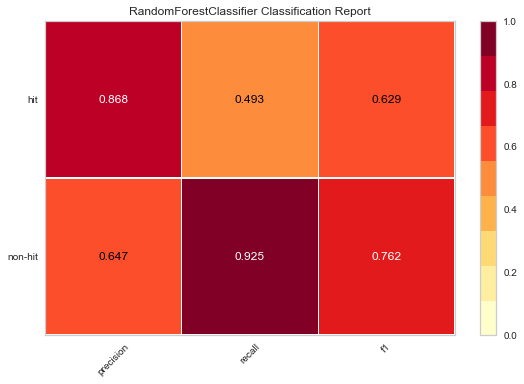

In [50]:

y_pred = lr.predict(X_test)

# Instantiate the classification model and visualizer
#bayes = GaussianNB()
visualizer = ClassificationReport(rf, classes=classes, support= False)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()   

In [47]:
rf = RandomForestClassifier()

In [48]:
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.7097537878787878

In [24]:
from sklearn.svm import LinearSVC

In [25]:
svc = LinearSVC()
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.724905303030303

In [26]:
from sklearn.metrics import classification_report
y_pred = svc.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.67      0.88      0.76      1058
           1       0.82      0.57      0.67      1054

    accuracy                           0.72      2112
   macro avg       0.75      0.72      0.72      2112
weighted avg       0.75      0.72      0.72      2112



In [27]:

from sklearn.datasets import load_breast_cancer


In [28]:
iris = load_breast_cancer()

In [29]:
x = iris.data
y = iris.target

In [30]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [31]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [32]:
d1 = pd.read_csv('/Users/abhijeet/Documents/Song Hit Prediction/DataSet/song_dataset.csv')

In [33]:
xx = d1.loc[:,'danceability': 'sections']
yy = d1['target']
scalar = MaxAbsScaler()
xx = scalar.fit_transform(xx)

In [34]:
x1 = np.array(xx)
y1 = np.array(yy)

In [35]:
y1[6000]

1

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [37]:
from yellowbrick.classifier import ROCAUC

/Users/abhijeet/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


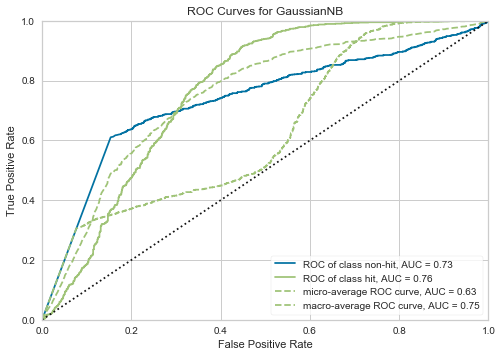

In [38]:
vw = ROCAUC(gnb, classes = classes)

vw.fit(X_train, y_train)        # Fit the training data to the visualizer
vw.score(X_test, y_test)        # Evaluate the model on the test data
vw.show()                       # Finalize and show the figure


In [39]:
from yellowbrick.classifier import ClassPredictionError

/Users/abhijeet/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


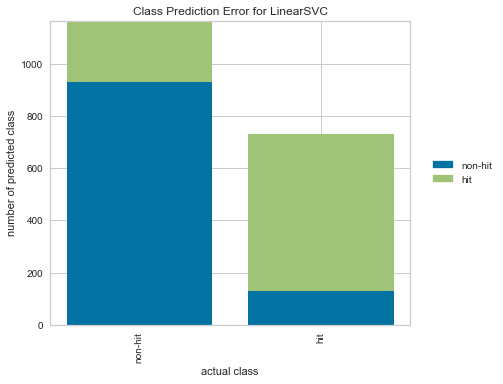

In [40]:
vww = ClassPredictionError(svc, classes = classes)

# Fit the training data to the visualizer
vww.fit(X_train, y_train)

# Evaluate the model on the test data
vww.score(X_test, y_test)

# Draw visualization
vww.show()

In [41]:
from yellowbrick.classifier import PrecisionRecallCurve

In [42]:
viz = PrecisionRecallCurve(rf)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

NameError: name 'rf' is not defined

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [44]:
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.7608901515151515

In [45]:
from yellowbrick.model_selection import FeatureImportances

/Users/abhijeet/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
/Users/abhijeet/opt/anaconda3/lib/python3.7/site-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


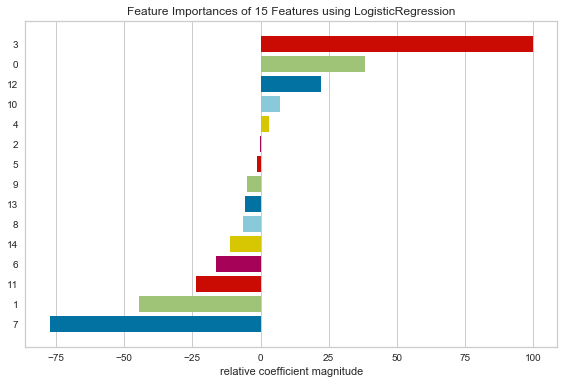

In [46]:
vz = FeatureImportances(lr)
vz.fit(X_train, y_train)
vz.show()